In [70]:
"""
Top level:
- Get benchmark version to work (bare minimum processing), record results
- Do feature engineering
- Test model after feature engineering
"""

'\nTop level:\n- Get benchmark version to work (bare minimum processing), record results\n- Do feature engineering\n- Test model after feature engineering\n'

In [48]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt 
import seaborn as sns

In [49]:
df = pd.read_csv('Rotten_Tomatoes_Movies.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         16638 non-null  object 
 1   movie_info          16614 non-null  object 
 2   critics_consensus   8309 non-null   object 
 3   rating              16638 non-null  object 
 4   genre               16621 non-null  object 
 5   directors           16524 non-null  object 
 6   writers             15289 non-null  object 
 7   cast                16354 non-null  object 
 8   in_theaters_date    15823 non-null  object 
 9   on_streaming_date   16636 non-null  object 
 10  runtime_in_minutes  16483 non-null  float64
 11  studio_name         16222 non-null  object 
 12  tomatometer_status  16638 non-null  object 
 13  tomatometer_rating  16638 non-null  int64  
 14  tomatometer_count   16638 non-null  int64  
 15  audience_rating     16386 non-null  float64
 16  audi

In [50]:
"""
Removing some features we won't use
"""
df.pop('audience_rating')
df.pop('on_streaming_date')
df.pop('movie_info')
df.pop('critics_consensus')
# df.pop('tomatometer_rating')

0        Though it may seem like just another Harry Pot...
1        Nicole Holofcener's newest might seem slight i...
2                                                      NaN
3        Sidney Lumet's feature debut is a superbly wri...
4        One of Disney's finest live-action adventures,...
                               ...                        
16633                                                  NaN
16634    The brilliantly well-rounded Zootopia offers a...
16635                                                  NaN
16636                                                  NaN
16637                                                  NaN
Name: critics_consensus, Length: 16638, dtype: object

In [51]:
df.head(3)

,movie_title,rating,genre,directors,writers,cast,in_theaters_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,83.0,20th Century Fox,Rotten,49,144,254287.0
1,Please Give,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,90.0,Sony Pictures Classics,Certified Fresh,86,140,11567.0
2,10,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,118.0,Waner Bros.,Fresh,68,22,14670.0


In [52]:
"""
Remove films without information on director and cast, 
OR films without both writers and studio name.
"""
df.dropna(subset=['directors'])
df.dropna(subset=['cast'])
df.dropna(subset=['writers', 'studio_name'])

# We've narrowed down 16638 entries to 15008

,movie_title,rating,genre,directors,writers,cast,in_theaters_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,83.0,20th Century Fox,Rotten,49,144,254287.0
1,Please Give,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,90.0,Sony Pictures Classics,Certified Fresh,86,140,11567.0
2,10,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,118.0,Waner Bros.,Fresh,68,22,14670.0
3,12 Angry Men (Twelve Angry Men),NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,95.0,Criterion Collection,Certified Fresh,100,51,105000.0
4,"20,000 Leagues Under The Sea",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,127.0,Disney,Fresh,89,27,68860.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16632,Zoom,PG,"Action & Adventure, Comedy, Kids & Family",Peter Hewitt,"Adam Rifkin, David Berenbaum","Tim Allen, Courteney Cox, Chevy Chase, Spencer...",2006-08-11,88.0,Sony Pictures Entertainment,Rotten,3,66,11327.0
16633,Zoot Suit,R,"Drama, Musical & Performing Arts",Luis Valdez,Luis Valdez,"Daniel Valdez, Edward James Olmos, Charles Aid...",1981-10-02,104.0,MCA Universal Home Video,Rotten,56,9,1192.0
16634,Zootopia,PG,"Action & Adventure, Animation, Comedy","Byron Howard, Rich Moore, Jared Bush","Jared Bush, Phil Johnston","Ginnifer Goodwin, Jason Bateman, Idris Elba, J...",2016-03-04,108.0,Walt Disney Animation Studios,Certified Fresh,97,279,100946.0
16636,Zulu,PG,"Classics, Drama","Cy Endfield, Cyril Endfield","Cy Endfield, John Prebble","Stanley Baker, Jack Hawkins, Ulla Jacobsson, J...",1964-06-17,139.0,Paramount Pictures,Fresh,95,21,30170.0


In [81]:
print(len(df['directors'].unique()))
print(len(df['genre'].unique()))

8315
1081


In [53]:
"""
For any values that are still null (type float), convert it to the string 'nan' for ease of manipulation later.
"""
for feature, values in df.items():
    for i in range(len(values)):
        if type(values[i]) == float:
            df.loc[i, feature] = 'nan'

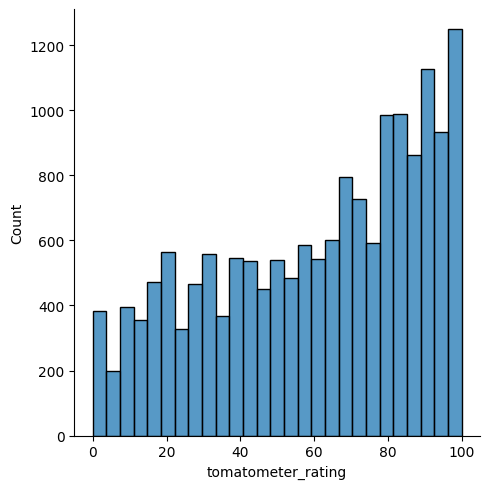

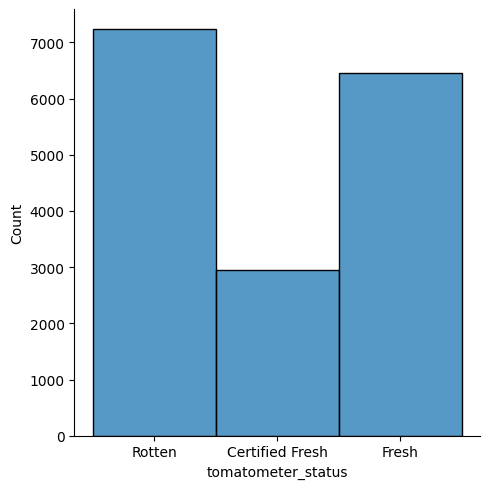

In [54]:
"""
Visualizing distribution of Tomatometer ratings and status
"""
sns.displot(data=df, x="tomatometer_rating")
sns.displot(data=df, x="tomatometer_status")

In [55]:
"""
Converting release date to release year
"""
date = df.pop('in_theaters_date')
year = []
for d in date:
    if type(d) == float or d == 'nan':
        year.append(-1)
    else:
        y = d[:4]
        year.append(int(y))
df['year_released'] = year

In [86]:

def generate_list(df, feature_name): #create a list of all unique feature values
    
    #Step 1: track all ratings associated with each feature in a dictionary
    feature_dict = {}
    for index, row in df.iterrows():
        feat = row[feature_name]
        for sub_feat in feat:
            if sub_feat not in feature_dict:
                feature_dict[sub_feat] = (df['tomatometer_rating'][index], 1) #add to dict, add 1 as number of occurences.
            else:
                feature_dict[sub_feat] = (feature_dict[sub_feat][0] + (df['tomatometer_rating'][index]), feature_dict[sub_feat][1] + 1)

    print(feature_dict)
    
    #Step 2: calculate average ratings for each feature
    for key in feature_dict:
        feature_dict[key] = feature_dict[key][0]/feature_dict[key][1] #average of all vote_averages
       
    #Step 3: create and sort a list of tuples (dictionary value, key)
    lst = list()
    for name in feature_dict:
        lst.append((feature_dict[name],name))
    lst = sorted(lst)
    
    #step 4: create a list of only the feature names, from lowest rating to highest rating
    feature_list = list()
    ratings_list = list()
    for element in lst:
        feature_list.append(element[1])
        ratings_list.append(element[0])
    
    #get the variance of the ratings. This is helpful for determining the usefulness of the information (to be displayed in below plot)
    var = round(np.var(ratings_list),3)
    
    #before returning the list, do a quick visualization to show that generate_list works
    fig, ax = plt.subplots(figsize=(6,5))
    
    X = [] #sample for associated movie(s) rating average
    Y = [] #sample for feature names
    n = 1 #adjust to change interval value
    for i in range(0, len(feature_list), n):
        X.append(ratings_list[i])
        Y.append(feature_list[i])
    
    y_pos = np.arange(len(Y))
    ax.barh(y_pos, X, align='center')
    #ax.set_yticklabels(Y)
    ax.invert_yaxis()  # labels read top-to-bottom
    
    ax.set_xlabel('Tomatometer Rating')
    ax.set_ylabel(feature_name + ' sample list index')
    ax.set_title(feature_name + ' to associated movie rating (' + str(len(Y)) + ' samples), variance: ' + str(var))
    
    plt.show()
    

{'A': (np.int64(638331), 10669), 'c': (np.int64(1022717), 16078), 't': (np.int64(1762504), 27606), 'i': (np.int64(1268585), 20188), 'o': (np.int64(1512396), 24902), 'n': (np.int64(1903434), 30383), ' ': (np.int64(3299884), 53485), '&': (np.int64(781886), 13213), 'd': (np.int64(534205), 9805), 'v': (np.int64(205566), 3711), 'e': (np.int64(2456402), 40180), 'u': (np.int64(769457), 12161), 'r': (np.int64(2057739), 32818), ',': (np.int64(1299012), 20614), 'C': (np.int64(425800), 7063), 'm': (np.int64(1291044), 20737), 'y': (np.int64(979598), 16919), 'D': (np.int64(721844), 10922), 'a': (np.int64(2337490), 35779), 'S': (np.int64(391603), 6546), 'F': (np.int64(269028), 4806), 's': (np.int64(1569835), 24349), 'R': (np.int64(109499), 1807), 'l': (np.int64(547966), 7683), 'K': (np.int64(58686), 1067), 'M': (np.int64(260313), 4422), 'p': (np.int64(295108), 4803), 'W': (np.int64(19468), 283), 'H': (np.int64(267297), 4312), 'I': (np.int64(264807), 3626), 'h': (np.int64(4998), 78), 'T': (np.int64(1

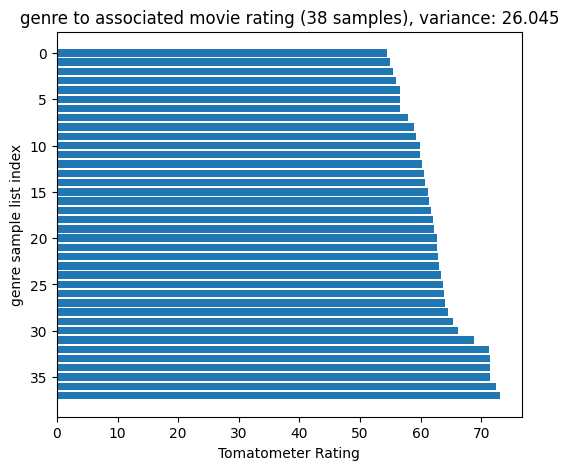

In [87]:
generate_list(df, 'genre')

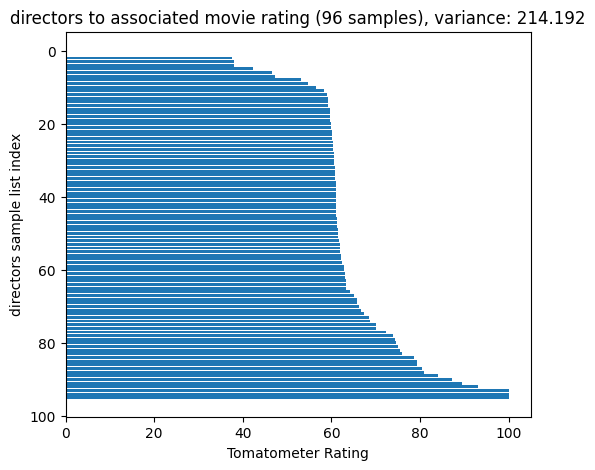

In [84]:
generate_list(df, 'directors')

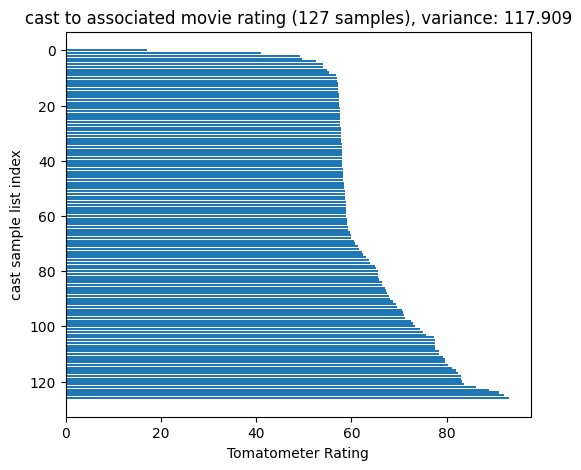

In [85]:
generate_list(df, 'cast')

### Feature Engineering starts here

In [56]:
"""
Categorizing years into decades. Min year is 1914, max is 2019. If no info available, append 'nan'
"""
decade = []
for i in range(len(year)):
        if 1910 < year[i] <= 1920:
            decade.append('1910s')
        elif 1920 < year[i] <= 1930:
            decade.append('1920s')
        elif 1930 < year[i] <= 1940:
            decade.append('1930s')
        elif 1940 < year[i] <= 1950:
            decade.append('1940s')
        elif 1950 < year[i] <= 1960:
            decade.append('1950s')
        elif 1960 < year[i] <= 1970:
            decade.append('1960s')
        elif 1970 < year[i] <= 1980:
            decade.append('1970s')
        elif 1980 < year[i] <= 1990:
            decade.append('1980s')
        elif 1990 < year[i] <= 2000:
            decade.append('1990s')
        elif 2000 < year[i] <= 2010:
            decade.append('2000s')
        elif 2010 < year[i] <= 2020:
            decade.append('2010s')
        else:
            decade.append('nan')

df['decade_released'] = decade

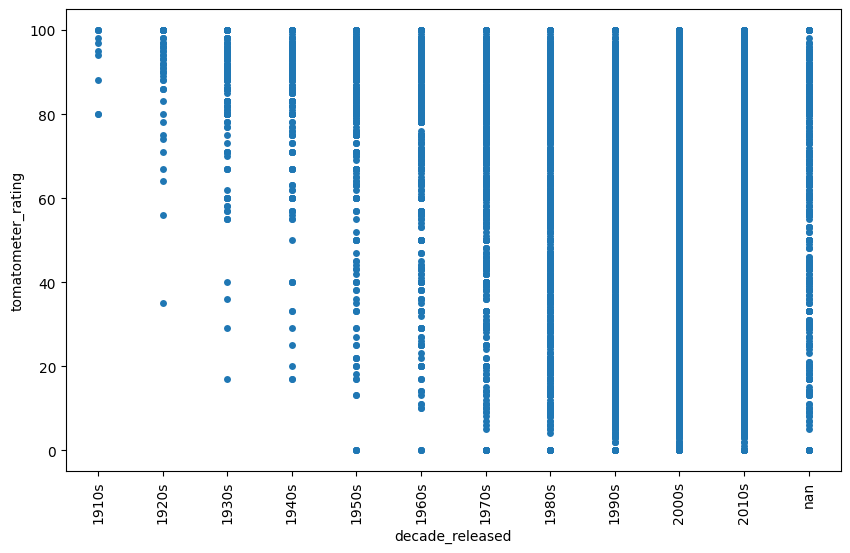

In [57]:
plt.figure(figsize=(10,6))
sns.stripplot(data = df,
              x='decade_released', y='tomatometer_rating', 
              order = ['1910s','1920s','1930s','1940s','1950s','1960s',
                       '1970s','1980s','1990s','2000s','2010s','nan'], jitter=False)
plt.xticks(rotation="vertical")
plt.show()